<a href="https://colab.research.google.com/github/aditya7812/job_portal_again/blob/master/Copy_of_DL_Project_5_face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [ ]:

from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2382.jpg', 'with_mask_2188.jpg', 'with_mask_3205.jpg', 'with_mask_2069.jpg', 'with_mask_3257.jpg']
['with_mask_31.jpg', 'with_mask_772.jpg', 'with_mask_23.jpg', 'with_mask_856.jpg', 'with_mask_1848.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1328.jpg', 'without_mask_2976.jpg', 'without_mask_699.jpg', 'without_mask_2613.jpg', 'without_mask_1461.jpg']
['without_mask_66.jpg', 'without_mask_2824.jpg', 'without_mask_3646.jpg', 'without_mask_2863.jpg', 'without_mask_584.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

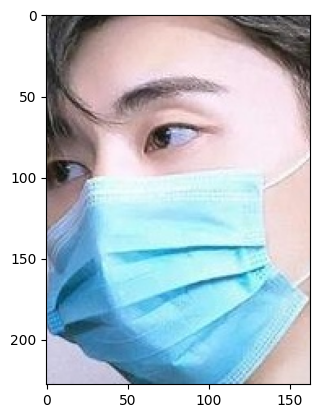

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

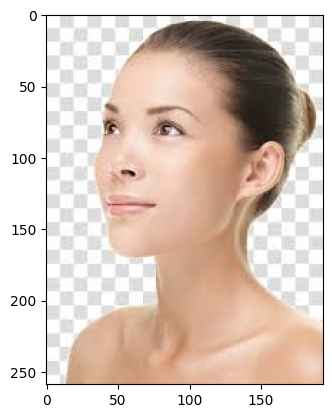

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

array([[[233, 236, 241],
        [233, 236, 241],
        [233, 236, 241],
        ...,
        [229, 230, 235],
        [229, 230, 235],
        [229, 230, 235]],

       [[233, 236, 241],
        [233, 236, 241],
        [233, 236, 241],
        ...,
        [229, 230, 235],
        [229, 230, 235],
        [229, 230, 235]],

       [[233, 236, 241],
        [233, 236, 241],
        [233, 236, 241],
        ...,
        [229, 230, 235],
        [229, 230, 235],
        [229, 230, 235]],

       ...,

       [[204, 221, 223],
        [211, 228, 231],
        [213, 230, 232],
        ...,
        [126, 147, 142],
        [119, 140, 137],
        [144, 164, 165]],

       [[215, 228, 230],
        [213, 227, 229],
        [219, 233, 235],
        ...,
        [134, 154, 151],
        [127, 148, 146],
        [148, 171, 169]],

       [[221, 233, 233],
        [222, 233, 234],
        [219, 232, 232],
        ...,
        [140, 159, 159],
        [133, 155, 154],
        [156, 180, 177]]], dtype=uint8)
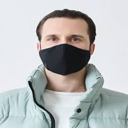

In [ ]:
data[0]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[235, 244, 251],
        [236, 245, 252],
        [236, 245, 252],
        ...,
        [245, 248, 253],
        [245, 248, 253],
        [245, 248, 253]],

       [[235, 244, 251],
        [236, 245, 252],
        [236, 245, 252],
        ...,
        [245, 248, 253],
        [245, 248, 253],
        [245, 248, 253]],

       [[235, 244, 251],
        [236, 245, 252],
        [236, 245, 252],
        ...,
        [245, 249, 253],
        [245, 249, 253],
        [245, 248, 253]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
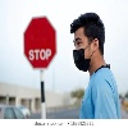

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.92156863, 0.95686275, 0.98431373],
        [0.9254902 , 0.96078431, 0.98823529],
        [0.9254902 , 0.96078431, 0.98823529],
        ...,
        [0.96078431, 0.97254902, 0.99215686],
        [0.96078431, 0.97254902, 0.99215686],
        [0.96078431, 0.97254902, 0.99215686]],

       [[0.92156863, 0.95686275, 0.98431373],
        [0.9254902 , 0.96078431, 0.98823529],
        [0.9254902 , 0.96078431, 0.98823529],
        ...,
        [0.96078431, 0.97254902, 0.99215686],
        [0.96078431, 0.97254902, 0.99215686],
        [0.96078431, 0.97254902, 0.99215686]],

       [[0.92156863, 0.95686275, 0.98431373],
        [0.9254902 , 0.96078431, 0.98823529],
        [0.9254902 , 0.96078431, 0.98823529],
        ...,
        [0.96078431, 0.97647059, 0.99215686],
        [0.96078431, 0.97647059, 0.99215686],
        [0.96078431, 0.97254902, 0.99215686]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9210 - loss: 0.2073 - val_acc: 0.9306 - val_loss: 0.1831
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9372 - loss: 0.1542 - val_acc: 0.9256 - val_loss: 0.1905
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9532 - loss: 0.1230 - val_acc: 0.9256 - val_loss: 0.2657
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9549 - loss: 0.1171 - val_acc: 0.9289 - val_loss: 0.2064
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9634 - loss: 0.0941 - val_acc: 0.9273 - val_loss: 0.2230
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9666 - loss: 0.0903 - val_acc: 0.9207 - val_loss: 0.2306
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9798 - loss: 0.0594 - val_acc: 0.9322 - val_loss: 0.2690
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9734 - loss: 0.0679 - val_acc: 0.9372 - val_loss: 0.2619
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9487 - loss: 0.1943
Test Accuracy = 0.939113199710846


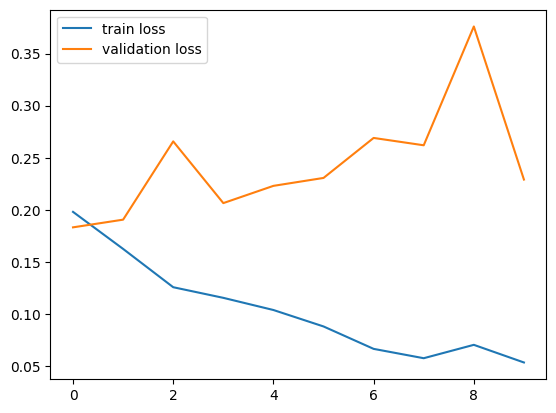

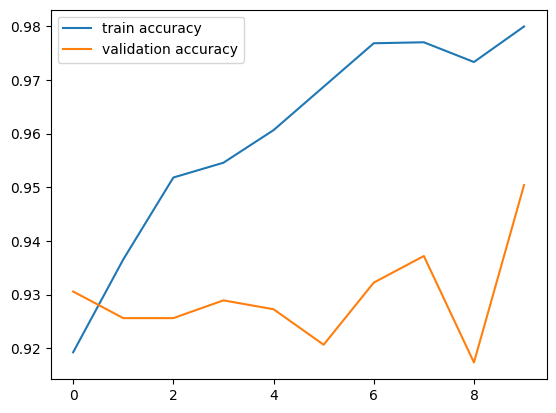

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: mask_img.jpg


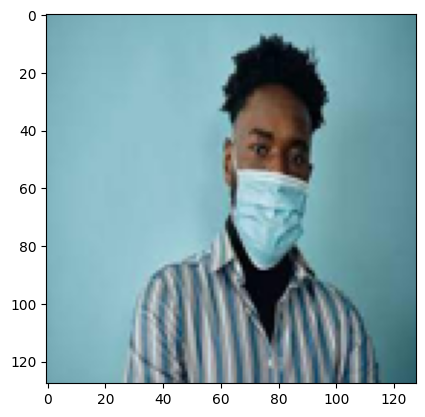

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = Image.open(input_image_path)


image = input_image.resize((128,128))

imgplot = plt.imshow(image)
plt.show()

image = image.convert('RGB')
image = np.array(image)

input_image_scaled = image/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1003.jpg


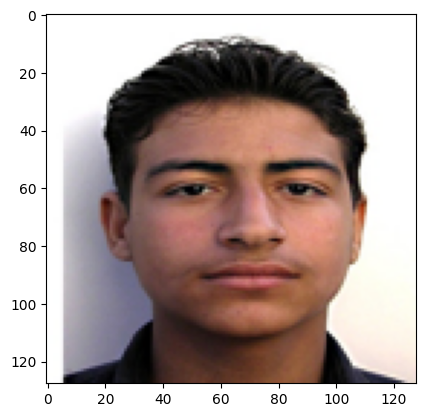

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = Image.open(input_image_path)


image = input_image.resize((128,128))

imgplot = plt.imshow(image)
plt.show()

image = image.convert('RGB')
image = np.array(image)

input_image_scaled = image/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')